# DataSet Information

Datasource : UCI Machine Learning Repository

Our data is downloaded from the above source given. The source consists of two different wine datasets (i.e. White-Wine and Red-Wine). This machine learning models was done only with the White-Wine dataset because this dataset is consists of more data instances than Red-Wine data sets.

Our primary objective of this task is to use machine learning models by understanding the data. Furthermore, our task involves appropriate selection of model's features, balancing data and to find the appropriate predictive scores for the data. The Overall task is divided into 4 parts Regression analysis, Classification-Supervised analysis, Semi-supervised models and Clustering models which is aggregated with 3 different files. 

This task include regression part which attribute nformation is given below:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):
12 - quality (score from 3 to 9)

# Importing necessary libraries for EDA.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Uplodaing the data**
- for our project we have choosen wine data. 
- Our data is reletively very clean. 
- Our data consist of 12 columns and 4898 rows or entries. 

In [8]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [9]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [10]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

<mark> The columns 'quality' is our target and we can see there are 9 unique values from 3 to 9. 

# Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<mark> From our data information above, we can see that there are 4894 rows and 11 features. The 12th feature which is 'quality' is our targer. There are no null values. The datatypes are either float of integer. The data is clean and we do not need to do anything in the data cleaning process. 

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<mark> Above, we have the discription of our data. Looking at the data, we can notice that there could be possile outliers. For instance, in 'residual sugar' column, the minimum value is 0.0, 75% value is 9.9 whereas the maximum value is 65,8. Hence, the standard deviation is a bit higher. Also in the 'free sulfur dioxide' column, there is an outlier where the standard deviation is much higher. There are similar cases in other columns as well. 
    
<mark> Quality is the target for our research as we can see 6 is the mean value of quality.</mark>

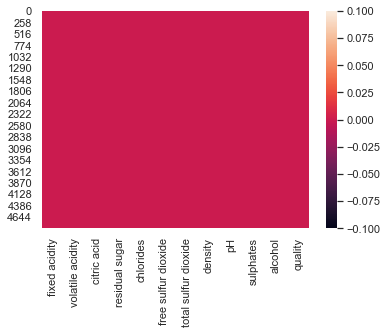

In [11]:
sns.heatmap(df.isnull()); #checking the null values by vizualizing. 

## Relationship of features with target

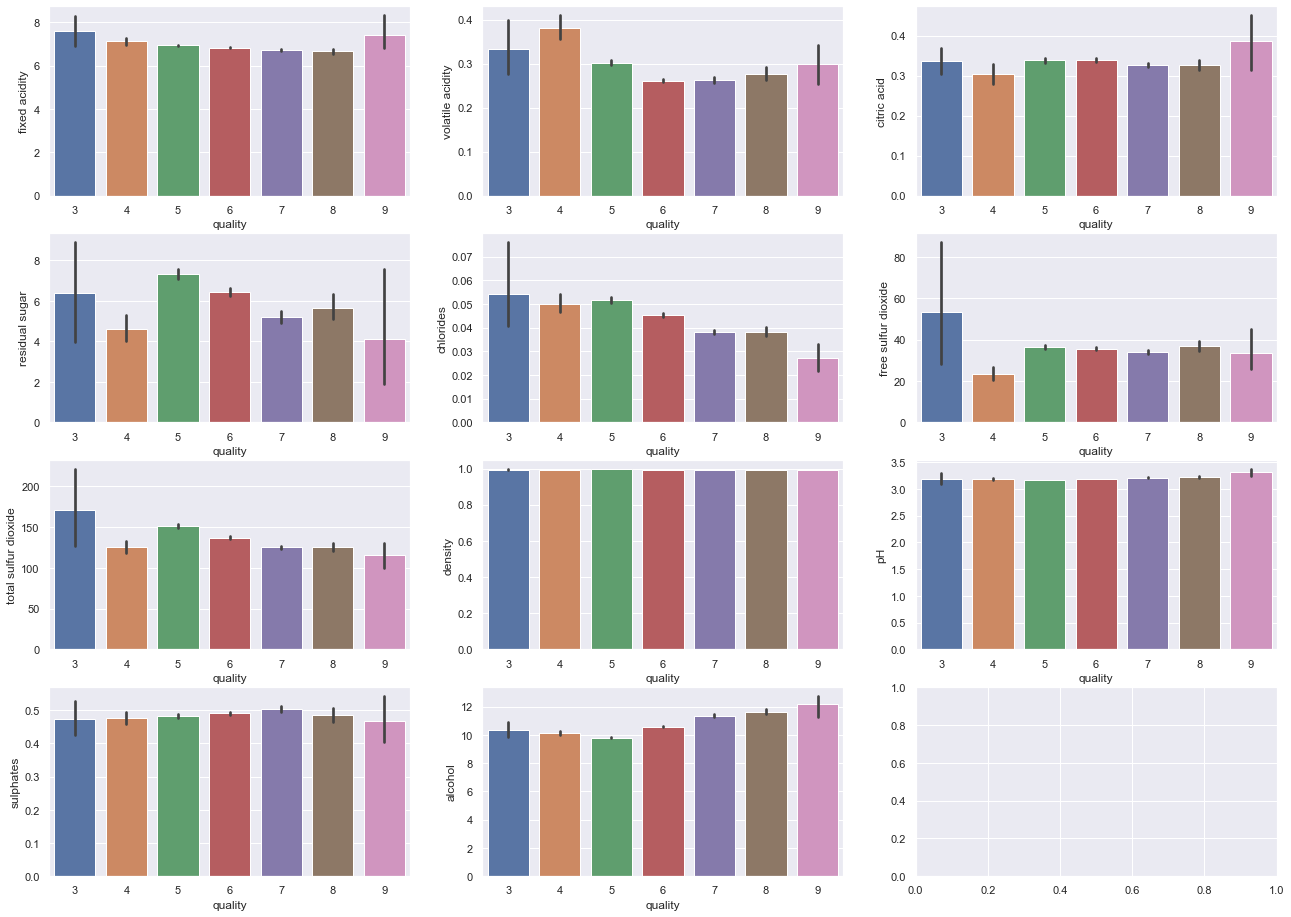

In [49]:
fig, ax1 = plt.subplots(4,3, figsize=(22,16))
k = 0
for i in range(4):
    for j in range(3):
        if k != 11:
            sns.barplot('quality',df.iloc[:,k], data=df, ax = ax1[i][j])
            k += 1
plt.show()
    

<mark> From the graph, we have six different features that seems to have some kind of relationship with the quality of Wine. They are residual sugar, chloride, total sulfur dioxide, citric acid, volatile acidity and content of the alcohol. Volatile acidity is less for the quality number 6. Citric acid is slightly high for the quality number 9. Chloride and sulfur-dioxide is decreasing while alcohol is increasing for the quality purpose of wine.

## Checking the outliers

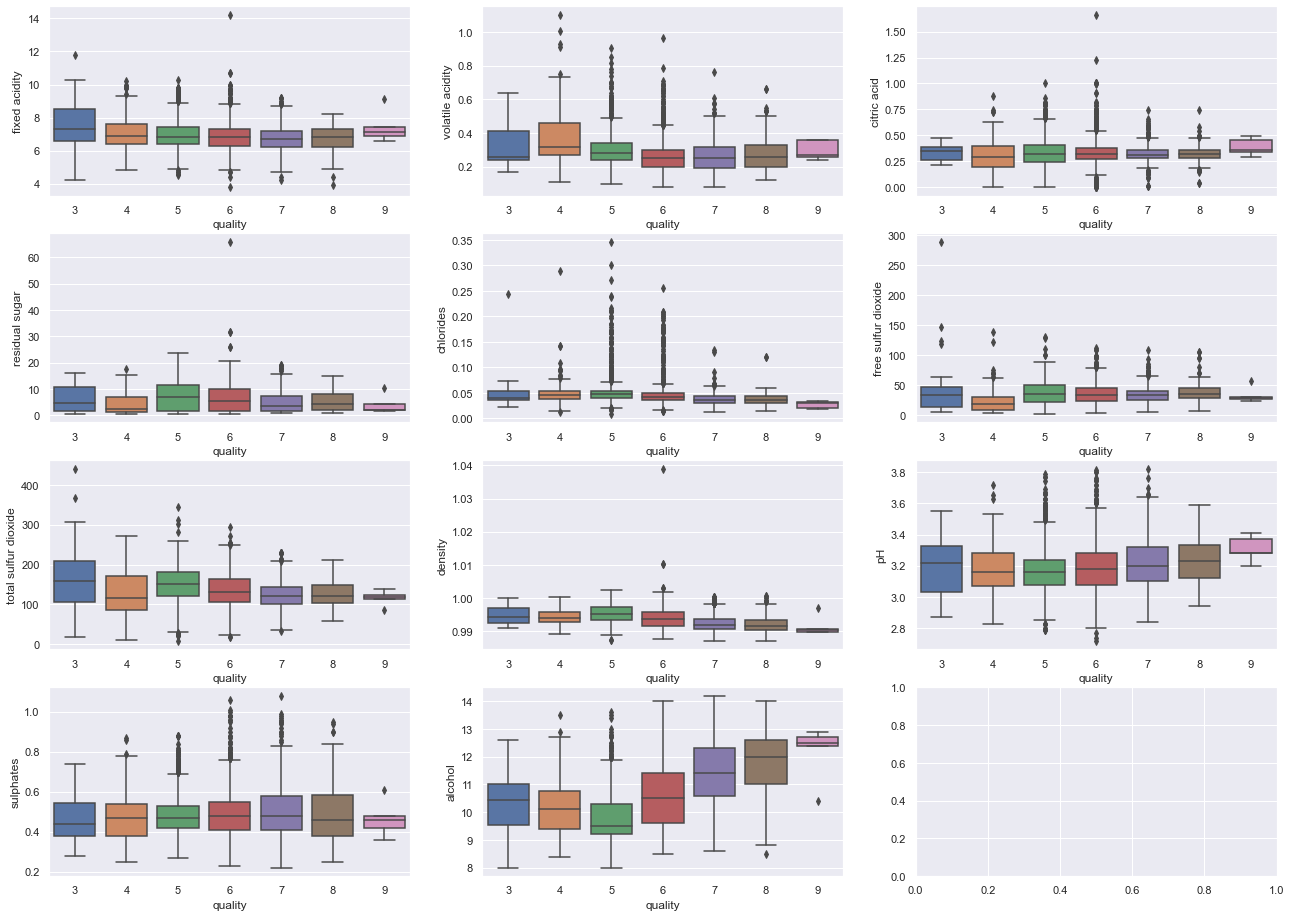

In [50]:
 
fig, ax1 = plt.subplots(4,3, figsize=(22,16))
k = 0
for i in range(4):
    for j in range(3):
        if k != 11:
            sns.boxplot('quality',df.iloc[:,k], data=df, ax = ax1[i][j])
            k += 1
plt.show()

<mark> Inspecting box plot above, we have few outlier for the features according to the quality. Instead of removing outliers, we will be using robust scaler method to tackle the outlier for developing the model.

## Multicolinearity check

<mark> Heat Map is to see how each features are correlated with each other, but our target is quality so we will mainy focus on quality. From the heat map below we can see which features are important for the quality.**

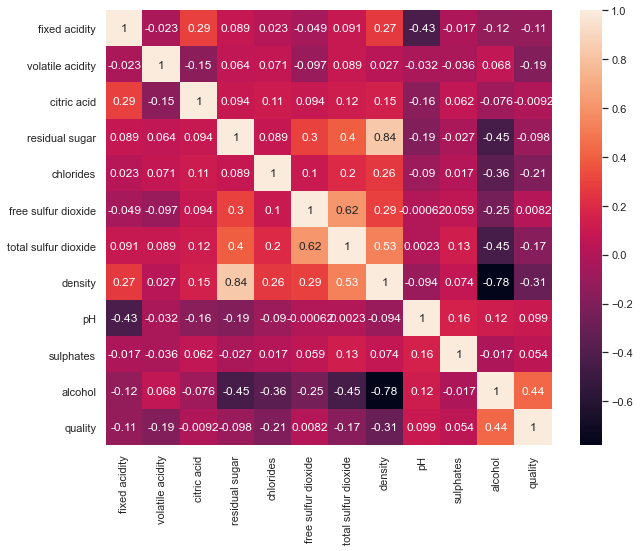

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

<mark> From the heatmap we can see that the columns 'density' and 'residual sugar' are highly correlated with correlation value of '0.84'. Also density has higher correlation with alcohol with the value '0.78'. Hence, we will drop this column as it has multicolinear realation with other features. 

In [14]:
df.drop(['density'], axis=1, inplace=True)

<mark> below we will see pair plot for each features to see the relationship between them. But our focus will be the relationship between the target and other features. 

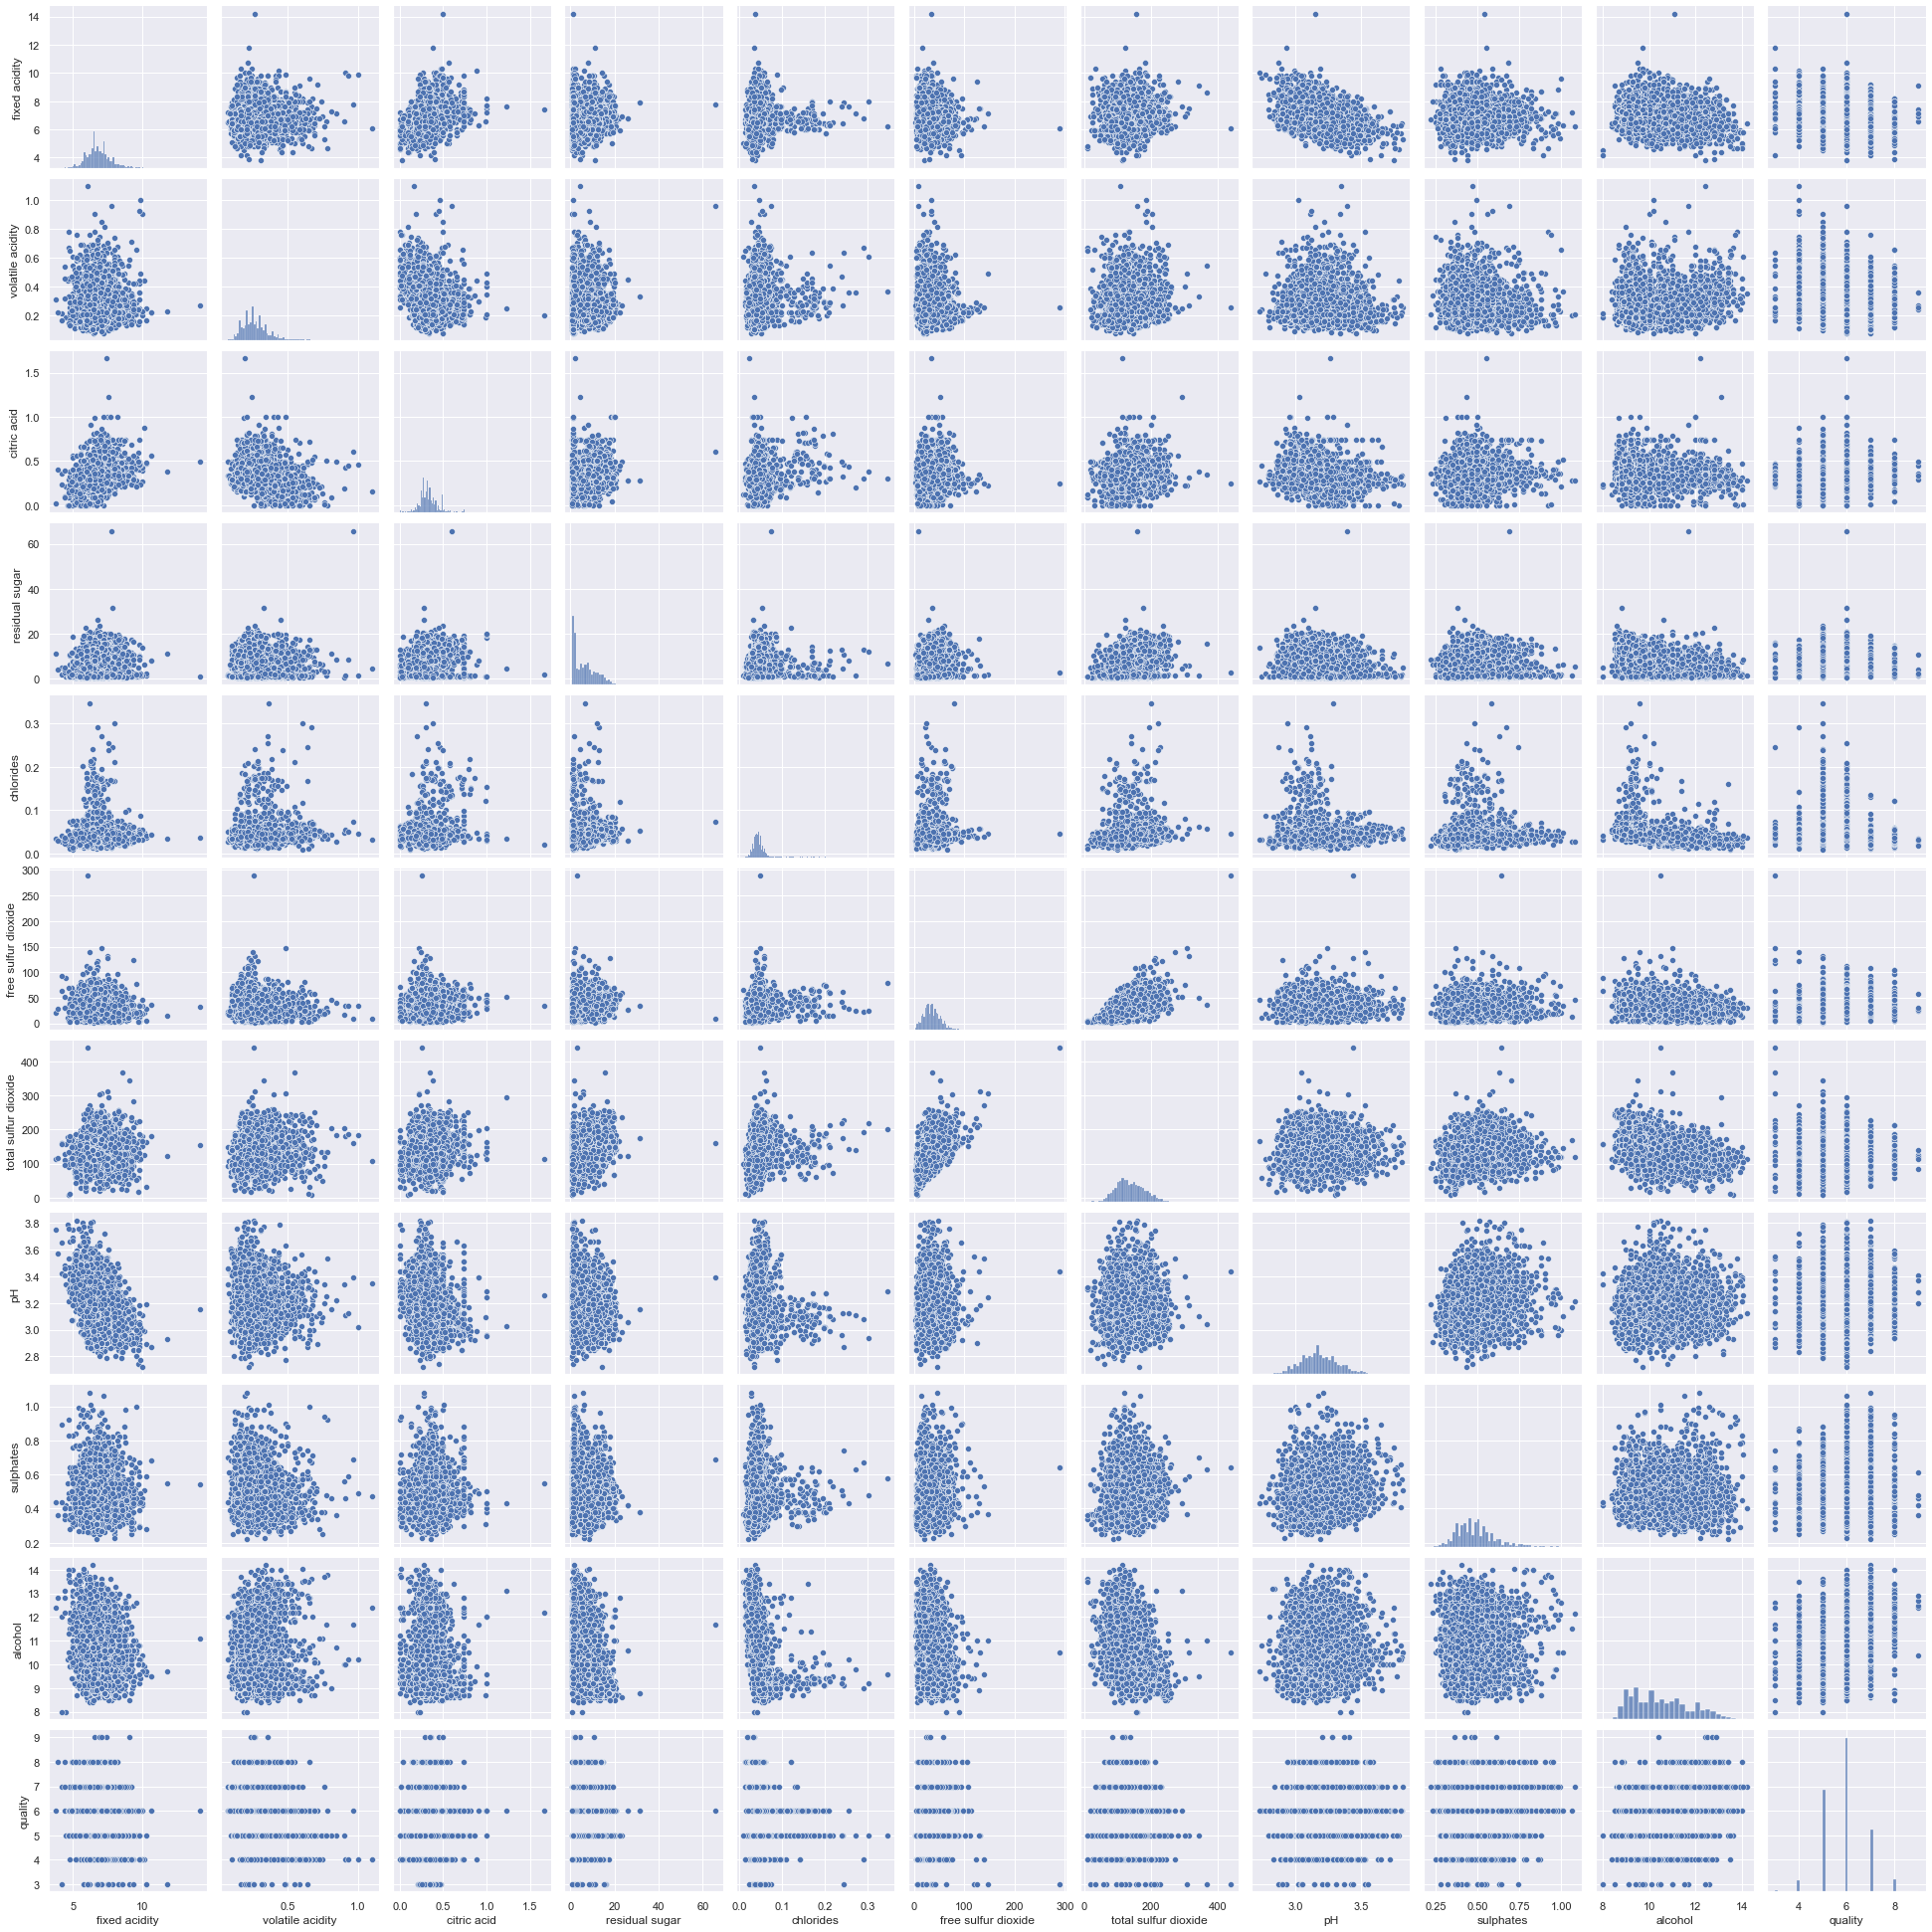

In [15]:
sns.pairplot(df)

# Preprocessing

## Scalling

<mark> Our data are not scaled they are some outlieres, so we are useing RobustScaler to scale our data.
$$NewXi = \frac {Xi-Xmd}{X0.75-X0.25}$$

In [29]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [30]:
scale = RobustScaler()
X_scale = scale.fit_transform(df.drop('quality', axis=1))
y = df['quality']
print(X_scale.shape)
print(y.shape)

(4898, 10)
(4898,)


## Feature selection
<mark> We will do a feature selection. We remove the unwanted features and keep the useful ones. We used the heatmap to remove on of the features manually but here we will use SelectKBest to select the most important features. We will select 6 most important features for which we will use k=6.

In [31]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
target_relation = mutual_info_regression(X_scale, y)
print(target_relation)
k_select = SelectKBest(k=6)
X_feature = k_select.fit_transform(X_scale,y)
print(f" The shape of the new selected features : {X_feature.shape}")

[0.02333368 0.03762316 0.05215118 0.0864219  0.05039015 0.05534698
 0.07772467 0.02377904 0.03235055 0.15152936]
 The shape of the new selected features : (4898, 6)


<mark> Here we select the features from the above output where the value is greator than 0.0503. We are just taking the 6 features from above choosing the 6 highest values. 

In [32]:
selected_columns = df.iloc[:,np.argwhere(target_relation>0.0503).flatten()].columns
selected_columns

Index(['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

## Data Balancing

<mark> If we check our target below, we can see that our target is very imbalanced. Hence, we will balance the target with the help of SMOTE.

In [33]:
np.unique(df.quality, return_counts = True)

(array([3, 4, 5, 6, 7, 8, 9]),
 array([  20,  163, 1457, 2198,  880,  175,    5]))

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(k_neighbors=4)
X_train_smote,y_train_smote = smote.fit_sample(X_feature,y)


print('Before SMOTE:', Counter(y))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})
After SMOTE: Counter({6: 2198, 5: 2198, 7: 2198, 8: 2198, 4: 2198, 3: 2198, 9: 2198})


<mark> After smote, we can see that our target is balanced. 

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11539, 6) (3847, 6) (11539,) (3847,)


# Importing libraries for ML
<mark> Importing all the necessary libraries for the Machine Learning, to predict our traget

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

# Assumptions of Linear Regression

## Prediction function

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"train score: {lr.score(X_train, y_train)}")
print(f"test score: {lr.score(X_test, y_test)}")

train score: 0.3619584993849241
test score: 0.35436636820599543


## Residual

In [38]:
predicted = lr.predict(X_train)
residual = y_train - predicted

In [40]:
df_result = pd.DataFrame({"Actual":y_train,"Predicted":predicted,"Residual":residual})
df_result.head()

,Actual,Predicted,Residual
1250,7,5.827663,1.172337
4761,6,5.482272,0.517728
1811,5,4.218711,0.781289
14916,9,6.169373,2.830627
8103,4,6.651704,-2.651704


## Check linearity
sns.lmplot()
- Plot data and regression model fits across a FacetGrid.

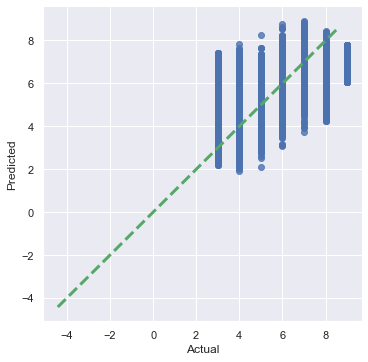

In [46]:
sns.lmplot(data = df_result, x="Actual",y="Predicted",fit_reg=False)
cord = np.arange(df_result.min().min(),df_result.max().max())
plt.plot(cord, cord,"g--",linewidth=3)

<mark> From the above diagram, we can see that linear regression is not the model to be used for this regression task. 

## Normality Check 
(Anderson Darling test)
- We need to check whether the data is distributed normally or not. If data is not normally distributed, it is necessary to scale the data for some of the ML algorithms.

In [51]:
from statsmodels.stats.diagnostic import normal_ad

p_value: 0.0
Residuals are not normally distributed


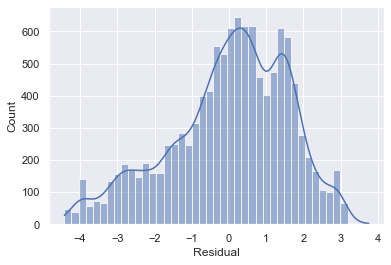

In [52]:
p_value = normal_ad(df_result["Residual"])[1] #p_value returns 2 values
print(f"p_value: {p_value}")
if (p_value<0.05):
    print("Residuals are not normally distributed")
    
else:
    print("Normally distributed")
    
sns.histplot(df_result["Residual"],kde=True);

<mark> From the figure above, we can see that the residuals are not normally distributed. It is a bit left skewed.

# Model Selection

<mark> Implementing GridSearchCV to choose the best algorithm for our data. After doing GridSearchCV we come to know that GradientBoostingRegressor is performing better than other model. So we choose to implement GradientBoostingRegressor for our regression problem.**

In [27]:
para_ = {'alpha': [0.01, 0.1, 1, 10,100],
           'max_iter': [1000, 10000]}
grid_las = GridSearchCV(Lasso(random_state=42), param_grid=para_, cv=5)
grid_las.fit(X_train, y_train)
print('Lasso')
print(f'Cross_validation_score: {grid_las.best_score_}')
print(grid_las.best_params_)
print('---------')
grid_rid = GridSearchCV(Ridge(random_state=42), param_grid=para_, cv=5)
grid_rid.fit(X_train, y_train)
print('Ridge')
print(f'Cross_validation_score: {grid_rid.best_score_}')
print(grid_rid.best_params_)
grid_linear = GridSearchCV(LinearRegression(), param_grid= {'normalize': [0]}, cv=5)
grid_linear.fit(X_train,y_train)
print('---------')
print('Linear')
print(f'Cross_validation_score: {grid_linear.best_score_}')
print(grid_linear.best_params_)

Lasso
Cross_validation_score: 0.37193850164515
{'alpha': 0.01, 'max_iter': 1000}
---------
Ridge
Cross_validation_score: 0.37223173838518164
{'alpha': 1, 'max_iter': 1000}
---------
Linear
Cross_validation_score: 0.37223143900854744
{'normalize': 0}


In [28]:
para_svr = {'C': [0.1, 10, 100],
           'epsilon': [0.01, 0.1, 1]}
grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid=para_svr, cv=3)
grid_svr.fit(X_train, y_train)
print('SVR')
print(f'Cross_validation_score: {grid_svr.best_score_}')
print(f'Best parameter : {grid_svr.best_params_}')

SVR
Cross_validation_score: 0.688569044204315
Best parameter : {'C': 100, 'epsilon': 1}


In [29]:
para_dt = {'max_depth': range(3,14)}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=para_dt, cv=4)
grid_dt.fit(X_train, y_train)
print('Decision Tree')
print(f'Cross_validation_score: {grid_dt.best_score_}')
print(f'Best parameter : {grid_dt.best_params_}')

Decision Tree
Cross_validation_score: 0.810229123084206
Best parameter : {'max_depth': 13}


In [30]:
para_rf = {'n_estimators': [100],
          'max_depth': range(6,14)}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=para_rf, cv=4)
grid_rf.fit(X_train, y_train)
print('Random Forest')
print(f'Cross_validation_score: {grid_rf.best_score_}')
print(f'Best parameter : {grid_rf.best_params_}')

Random Forest
Cross_validation_score: 0.8970911554943317
Best parameter : {'max_depth': 13, 'n_estimators': 100}


In [31]:
para_ad = {'n_estimators': [200,300],
          'learning_rate': [0.01,0.1,1,10]}
grid_ad = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=para_ad, cv=3)
grid_ad.fit(X_train, y_train)
print('AdaBoost-Regressor')
print(f'Cross_validation_score: {grid_ad.best_score_}')
print(f'Best parameter : {grid_ad.best_params_}')

AdaBoost-Regressor
Cross_validation_score: 0.5684476834042339
Best parameter : {'learning_rate': 0.1, 'n_estimators': 200}


In [32]:
para_gb = {'learning_rate': [0.01,0.1,1,10],
          'n_estimators': [100, 200, 300]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=para_gb, cv=3)
grid_gb.fit(X_train, y_train)
print('GradientBoost-Regressor')
print(f'Cross_validation_score: {grid_gb.best_score_}')
print(f'Best parameter : {grid_gb.best_params_}')

C:\Users\public\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\public\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\public\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\public\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\public\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\public\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:211: Runt

GradientBoost-Regressor
Cross_validation_score: 0.7768751756739003
Best parameter : {'learning_rate': 0.1, 'n_estimators': 300}


<mark> For our model selection purpose, We have short listed three regression models whose cross-validation score is promising for the further analysis. For the further analysis, we decided to put those 3 models (i.e. SVR, RF, GB) in the ensemble method. For the ensemble methode we have choosen Voting - Regressor.

# Fitting model with Ensemble method for the best estimators

In [62]:
estimators = []
estimators.append(('SVR', SVR(C= 10, epsilon= 0.01, kernel= 'rbf')))
estimators.append(('RF', RandomForestRegressor(max_depth= 8, min_samples_leaf= 6, n_estimators=200)))
estimators.append(('GB', GradientBoostingRegressor(learning_rate= 0.1, loss= 'ls', n_estimators= 300)))


In [63]:
vot = VotingRegressor(estimators=estimators)
vot.fit(X_train,y_train)
y_pred = vot.predict(X_test)
score = mean_squared_error(y_test,y_pred)
print(score)

0.7735811840711758


In [64]:
print(vot.score(X_train,y_train))
print(vot.score(X_test,y_test))

0.8304420539002519
0.8070117038638032


# Conclusion

- Our voting ensemble model have an score of 0.83 and able to nicely fit the data to the test result also with a score of 0.80. This gives the generalization quite well if considered as the regression method and therefore this can use the model for the reggresion task.